# Analyse og Forudsigelse af Ordredata


## Loading the Data:

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import preprocessing as prep

In [45]:
df = pd.read_csv(r"C:\Users\moham\Downloads\Orders.csv", skiprows=4)

In [46]:
df.head()

,Order ID,Order Date,Country,City,Branch,Lat,Lng,Customer First Name,Customer Last Name,Email,Phone Number,Category,Sub Category,Item,SalesPerson ID,Quantity,Unit Price,Discount,Status
0,1.0,1/1/2023,Syria,homs,hs01,34.7326,36.7136,lina,alrrashid,LINA.ALRRASHID@MAIL.COM,Tel: 5634962795,Tablet,Apple iPad,"iPad Pro 12.9""",N498,1.0,999.0,39.96,False
1,2.0,1/1/2023,Saudi Arabia,riyadh,rd01,24.7136,46.6753,omar,eurul,OMAR.EURUL@MAIL.COM,Tel: 5311455624,Smartphone,Samsung Galaxy,Galaxy S21 Ultra,X918,1.0,1199.0,119.90,True
2,3.0,1/1/2023,Saudi Arabia,riyadh,rd03,24.7743,46.7386,iman,iismaeil,IMAN.IISMAEIL@MAIL.COM,Tel: 5272740777,Digital Camera,Panasonic Lumix,Panasonic Lumix GH5,I036,1.0,1299.0,NaN,True
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,1/1/2023,United Arab Emirates,abu dhabi,ad01,24.4539,54.3773,ahmad,rihan,AHMAD.RIHAN@MAIL.COM,Tel: 5783343440,Tablet,Samsung Galaxy Tab,Galaxy Tab A8,E804,2.0,199.0,27.86,True


In [47]:
df.tail()

,Order ID,Order Date,Country,City,Branch,Lat,Lng,Customer First Name,Customer Last Name,Email,Phone Number,Category,Sub Category,Item,SalesPerson ID,Quantity,Unit Price,Discount,Status
19999,19996.0,1/9/2023,Morocco,casablanca,cs01,33.5731,7.5898,ahmad,iad,AHMAD.IAD@MAIL.COM,Tel: 5880578642,Gaming Console,Sony PlayStation,PlayStation 4 Pro,M210,1.0,399.0,11.97,True
20000,19997.0,1/9/2023,Syria,homs,hs01,34.7326,36.7136,ali,kiali,Ali.kiali@mail.com,Tel: 5286384144,Smartwatch,Fossil Gen,Fossil Gen 6,Z826,2.0,299.0,59.80,True
20001,19998.0,1/9/2023,USA,las vegas,lv01,36.1699,-115.1398,husayn,salayk,husayn.salayk@mail.com,Tel: 5463888674,Gaming Console,Sony PlayStation,PlayStation 2,K624,1.0,99.0,2.97,True
20002,19999.0,1/9/2023,Saudi Arabia,jeddah,jd03,21.4858,39.1925,fatin,bahriin,Fatin.bahriin@mail.com,Tel: 5931562498,Headphones,JBL Live,JBL Live 500BT,Y368,1.0,99.0,3.96,True
20003,20000.0,1/9/2023,USA,washington,wh01,38.9072,-77.0369,ahmad,shakur,Ahmad.shakur@mail.com,Tel: 5338549800,Smartwatch,Samsung Galaxy,Galaxy Watch Active 2,Y590,1.0,249.0,4.98,True


##  Exploratory Data Analysis (EDA)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20004 entries, 0 to 20003
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order ID             20000 non-null  float64
 1   Order Date           20000 non-null  object 
 2   Country              20000 non-null  object 
 3   City                 20000 non-null  object 
 4   Branch               20000 non-null  object 
 5   Lat                  20000 non-null  float64
 6   Lng                  20000 non-null  float64
 7   Customer First Name  20000 non-null  object 
 8   Customer Last Name   20000 non-null  object 
 9   Email                20000 non-null  object 
 10  Phone Number         20000 non-null  object 
 11  Category             20000 non-null  object 
 12  Sub Category         20000 non-null  object 
 13  Item                 20000 non-null  object 
 14  SalesPerson ID       20000 non-null  object 
 15  Quantity             20000 non-null 

In [49]:
# See how it looks (get 4 random records)
df.sample(4)

,Order ID,Order Date,Country,City,Branch,Lat,Lng,Customer First Name,Customer Last Name,Email,Phone Number,Category,Sub Category,Item,SalesPerson ID,Quantity,Unit Price,Discount,Status
1767,1764.0,22/1/2023,USA,new york,ny03,40.7498,-73.9814,hamzaa,alsiyah,hamzaa.alsiyah@mail.com,Tel: 5918059157,VR Headset,Valve Index,Valve Index VR Kit 2,N259,13.0,1199.0,623.48,False
3782,3779.0,15/2/2023,Egypt,cairo,cr03,30.0444,31.2357,rannym,eataya,rannym.eataya@mail.com,Tel: 5420514309,VR Headset,Valve Index,Valve Index VR Kit,X209,1.0,999.0,19.98,False
11692,11689.0,21/5/2023,France,paris,ps01,48.8566,2.3522,bashshar,almisri,BASHSHAR.ALMISRI@MAIL.COM,Tel: 5479990559,Tablet,Lenovo Tab,Lenovo Tab P11 Pro,F510,1.0,499.0,14.97,True
18214,18211.0,10/8/2023,Saudi Arabia,aseer,as01,18.2311,42.5004,fadi,rinkusi,fadi.rinkusi@mail.com,Tel: 5982991701,Smartwatch,Huawei Watch,Huawei Watch Fit 2 Pro,Z594,1.0,129.0,NaN,False


In [50]:
# Statistical summary of the data
df.describe()

,Order ID,Lat,Lng,Quantity,Unit Price,Discount
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,18889.000000
mean,10000.500000,30.461665,11.339318,1.936750,609.292000,65.021528
std,5773.647028,8.126746,53.194139,2.288736,617.976051,145.481646
min,1.000000,18.231100,-115.149200,1.000000,29.000000,0.290000
25%,5000.750000,24.453900,2.352200,1.000000,179.000000,9.800000
50%,10000.500000,27.180900,37.134300,1.000000,399.000000,23.980000
75%,15000.250000,36.202100,42.500400,2.000000,899.000000,64.900000
max,20000.000000,48.856600,56.324200,13.000000,3999.000000,3999.000000


In [51]:
df2 = df [['Country','City', 'Quantity', 'Unit Price']] 

In [52]:
df2

,Country,City,Quantity,Unit Price
0,Syria,homs,1.0,999.0
1,Saudi Arabia,riyadh,1.0,1199.0
2,Saudi Arabia,riyadh,1.0,1299.0
3,NaN,NaN,NaN,NaN
4,United Arab Emirates,abu dhabi,2.0,199.0
...,...,...,...,...
19999,Morocco,casablanca,1.0,399.0
20000,Syria,homs,2.0,299.0
20001,USA,las vegas,1.0,99.0
20002,Saudi Arabia,jeddah,1.0,99.0


In [53]:
df2.groupby(['Country', 'City']).agg(["sum" ,"mean"])

Quantity           Unit Price            
                                     sum      mean        sum        mean
Country              City                                                
Egypt                asyut        2004.0  1.879925   652234.0  611.851782
                     cairo        2653.0  1.881560   870030.0  617.042553
France               paris        2201.0  1.956444   672175.0  597.488889
Morocco              casablanca   1179.0  1.942339   373873.0  615.935750
Saudi Arabia         aseer        1653.0  1.922093   551020.0  640.720930
                     dammam        985.0  2.006110   303619.0  618.368635
                     jeddah       6167.0  1.935656  1941374.0  609.345261
                     riyadh       2989.0  1.940909   950890.0  617.461039
Syria                aleppo       2138.0  1.847882   668973.0  578.196197
                     damascus     1300.0  1.884058   400690.0  580.710145
                     homs         1525.0  1.945153   472436.0  602.596939
USA                  las vegas    2505.0  1.935858   807366.0  623.930448
                     new york     4209.0  2.006196  1273192.0  606.859867
                     washington   1578.0  1.892086   520276.0  623.832134
United Arab Emirates abu dhabi    4555.0  2.005724  1384719.0  609.739762
                     dubai         840.0  1.862528   263039.0  583.235033
                     fujairah      254.0  1.867647    79934.0  587.750000

## Data Cleaning

In [54]:
# Check for missing values
df.isnull().sum()

Order ID                  4
Order Date                4
Country                   4
City                      4
Branch                    4
Lat                       4
Lng                       4
Customer First Name       4
Customer Last Name        4
Email                     4
Phone Number              4
Category                  4
Sub Category              4
Item                      4
SalesPerson ID            4
Quantity                  4
Unit Price                4
Discount               1115
Status                    4
dtype: int64

In [55]:
df = df.drop_duplicates()

In [56]:
df = df.dropna()

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18889 entries, 0 to 20003
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order ID             18889 non-null  float64
 1   Order Date           18889 non-null  object 
 2   Country              18889 non-null  object 
 3   City                 18889 non-null  object 
 4   Branch               18889 non-null  object 
 5   Lat                  18889 non-null  float64
 6   Lng                  18889 non-null  float64
 7   Customer First Name  18889 non-null  object 
 8   Customer Last Name   18889 non-null  object 
 9   Email                18889 non-null  object 
 10  Phone Number         18889 non-null  object 
 11  Category             18889 non-null  object 
 12  Sub Category         18889 non-null  object 
 13  Item                 18889 non-null  object 
 14  SalesPerson ID       18889 non-null  object 
 15  Quantity             18889 non-null  floa

In [58]:
df2.isnull().sum()

Country       4
City          4
Quantity      4
Unit Price    4
dtype: int64

In [59]:
df2 = df2.dropna()

In [62]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 20003
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     20000 non-null  object 
 1   City        20000 non-null  object 
 2   Quantity    20000 non-null  float64
 3   Unit Price  20000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 781.2+ KB


### Visualization of Dataset Statistics
    1. Draw Box-Whisker Plots
    2. Draw Histograms
    3. Draw Scatter Plot

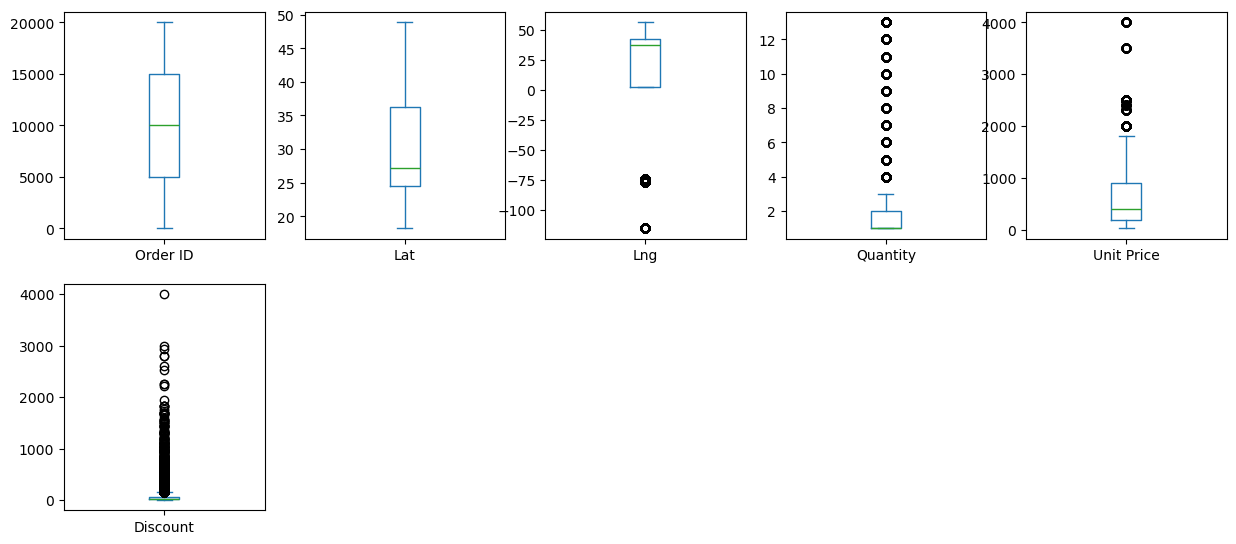

In [63]:
# Draw box-whisker plots
df.plot(kind='box', subplots=True, layout=(3,5), sharex=False, sharey=False ,figsize=(15, 10))
plt.show()

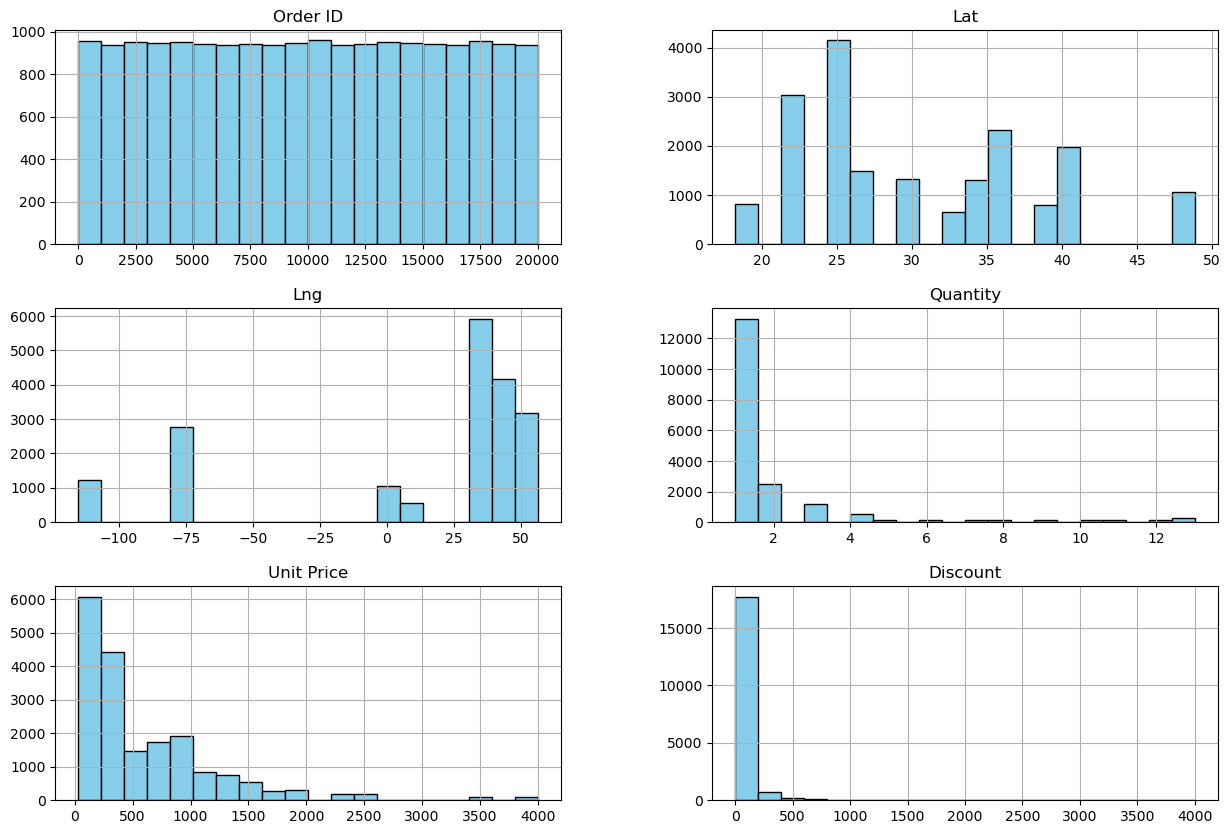

In [64]:
# Draw histograms for each feature
df.hist(bins=20, color='skyblue', edgecolor='black', figsize=(15, 10))
plt.show()

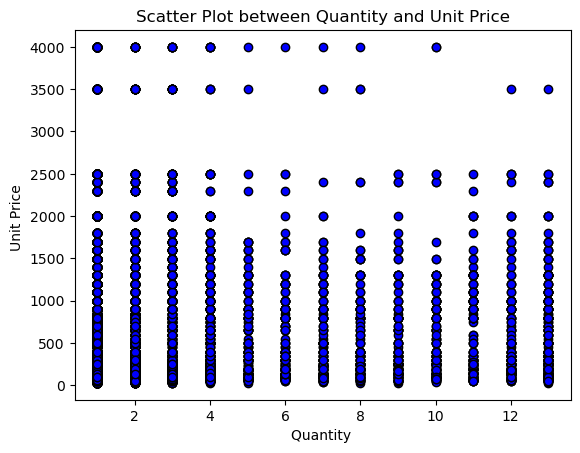

In [69]:
plt.scatter(df2['Quantity'], df2['Unit Price'], color='blue', edgecolor='black')

# Tilføj akse labels og titel
plt.title('Scatter Plot between Quantity and Unit Price')
plt.xlabel('Quantity ')
plt.ylabel('Unit Price ') 
plt.show()

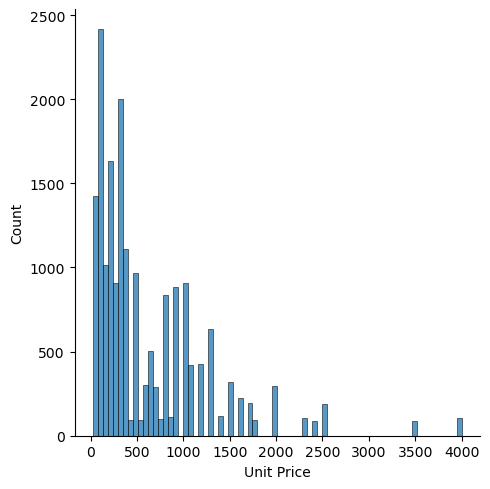

In [81]:
sns.displot(df['Unit Price'],  label='Unit Price') 